# Test Tomato Disease Prediction with VGG16 Model

## Importing Libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing import image
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

## Load the Trained Model

In [2]:
model = tf.keras.models.load_model('best_model.keras')

2024-07-29 03:36:30.684209: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-07-29 03:36:30.684281: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-07-29 03:36:30.684292: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-07-29 03:36:30.684340: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-07-29 03:36:30.684364: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


## Prepare the Validation Set as Test Data

In [3]:
validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
validation_set = validation_datagen.flow_from_directory(
    'valid',  # Replace with your validation directory
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

Found 5460 images belonging to 10 classes.


In [4]:
# Get class names from the validation set
class_names = list(validation_set.class_indices.keys())
print("Class names:", class_names)

Class names: ['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']


## Evaluate the Model

In [5]:
# Evaluate the model on the validation set
loss, accuracy = model.evaluate(validation_set)
print(f"Validation accuracy: {accuracy * 100:.2f}%")

2024-07-29 03:36:52.308492: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
/opt/anaconda3/envs/tf-m1/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


171/171 ━━━━━━━━━━━━━━━━━━━━ 18s 105ms/step - accuracy: 0.8545 - loss: 0.4042
Validation accuracy: 85.18%


## Get True Labels and Predictions

In [6]:
y_true = validation_set.classes
y_pred = model.predict(validation_set)
y_pred_classes = np.argmax(y_pred, axis=1)

171/171 ━━━━━━━━━━━━━━━━━━━━ 17s 100ms/step


In [7]:
# Debugging: Print lengths of y_true and y_pred_classes
print(f"Length of y_true: {len(y_true)}")
print(f"Length of y_pred_classes: {len(y_pred_classes)}")

Length of y_true: 5460
Length of y_pred_classes: 5460


## Compute and Print Classification Report & Confusion Matrix

                                               precision    recall  f1-score   support

                      Tomato___Bacterial_spot       0.09      0.09      0.09       501
                        Tomato___Early_blight       0.12      0.11      0.11       570
                         Tomato___Late_blight       0.12      0.10      0.11       548
                           Tomato___Leaf_Mold       0.09      0.08      0.09       557
                  Tomato___Septoria_leaf_spot       0.11      0.12      0.11       518
Tomato___Spider_mites Two-spotted_spider_mite       0.10      0.15      0.12       521
                         Tomato___Target_Spot       0.08      0.07      0.07       543
       Tomato___Tomato_Yellow_Leaf_Curl_Virus       0.08      0.08      0.08       590
                 Tomato___Tomato_mosaic_virus       0.08      0.10      0.09       546
                             Tomato___healthy       0.09      0.09      0.09       566

                                     accu

<Figure size 1000x1000 with 0 Axes>

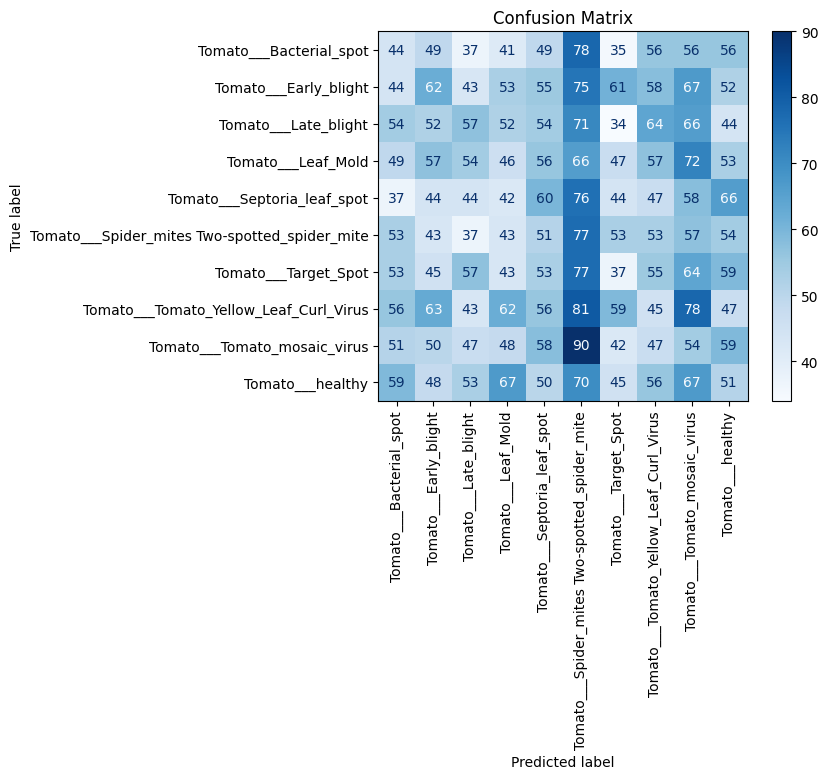

In [8]:
# Ensure y_true and y_pred_classes have the same length and contain valid data
if len(y_true) == len(y_pred_classes) and len(y_true) > 0:
    # Compute and print classification report
    report = classification_report(y_true, y_pred_classes, target_names=class_names)
    print(report)

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred_classes)
    cmd = ConfusionMatrixDisplay(cm, display_labels=class_names)

    # Plot confusion matrix
    plt.figure(figsize=(10, 10))
    cmd.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')
    plt.title('Confusion Matrix')
    plt.show()
else:
    print("Error: y_true and y_pred_classes do not have the same length or are empty")

## Function to Predict and Visualize a Single Image

In [9]:
def predict_and_visualize_image(img_path, model, class_names):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    # Predict the disease
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)

    # Display the image and prediction
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.title(f"Predicted: {class_names[predicted_class[0]]}")
    plt.axis('off')
    plt.show()

    print(f"Prediction: {class_names[predicted_class[0]]}")

## Test the Model with a Single Image from the Test Directory

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


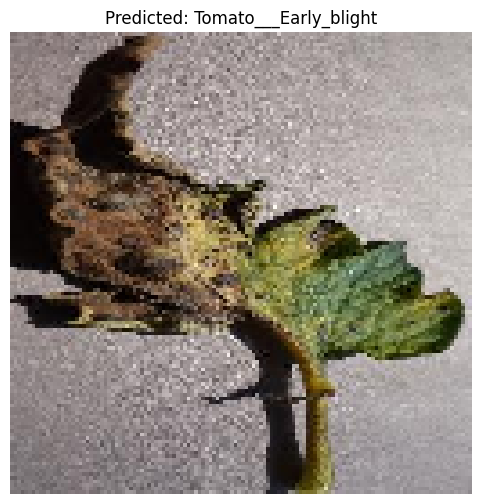

Prediction: Tomato___Early_blight


In [12]:
# Test the Model with a Single Image from the Test Directory
test_img_path = 'test/test/TomatoEarlyBlight1.JPG'  # Replace with the path to your test image
predict_and_visualize_image(test_img_path, model, class_names)